<a href="https://colab.research.google.com/github/NilienaCelineBiju/SURGE-2023/blob/main/Binary_HGF_with_2_levels_and_Circular_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyhgf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 2.7 MB/s eta 0:00:00


In [ ]:
import jax.numpy as jnp
from pyhgf.model import HGF
from pyhgf import load_data
import seaborn as sns
import matplotlib.pyplot as plt

timeserie = load_data("binary")

two_levels_hgf = HGF(
    n_levels = 2,
    model_type = "binary",
    initial_mu= { "1": .0, "2": .5},
    initial_pi= { "1": .0, "2":1e4},
    omega = {"2": -3.0}
)

two_levels_hgf.plot_network()

two_level_hgf = two_levels_hgf.input_data(input_data = timeserie)

Creating a binary Hierarchical Gaussian Filter with 2 levels.
Add 320 new binary observations.


In [ ]:
import jax.numpy as jnp
from pyhgf.model import HGF
from pyhgf import load_data
import seaborn as sns
import matplotlib.pyplot as plt

timeserie = load_data("binary")
timeserie

array([1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1.

array([<Axes: ylabel='$\\mu_2$'>, <Axes: ylabel='$\\mu_1$'>, <Axes: >],
      dtype=object)

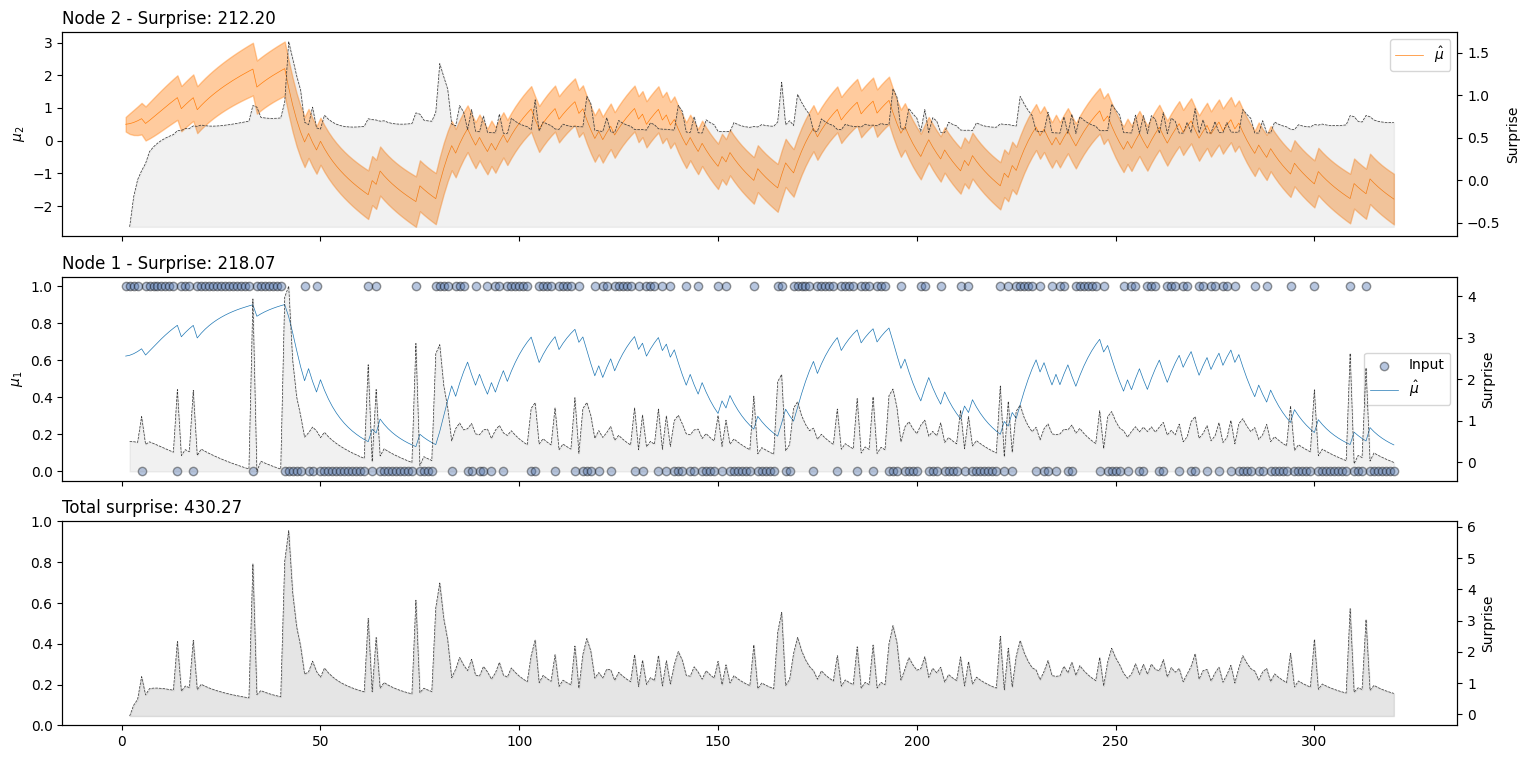

In [ ]:
two_levels_hgf.plot_trajectories()

In [ ]:
two_levels_hgf.surprise()

Array(203.63953, dtype=float32)

In [ ]:
three_levels_hgf = HGF(
    n_levels=3,
    model_type="binary",
    initial_mu={"1": .0, "2": .5, "3": 0.},
    initial_pi={"1": .0, "2": 1e4, "3": 1e1},
    omega={"1": None, "2": -3.0, "3": -2.0},
    rho={"1": None, "2": 0.0, "3": 0.0},
    kappas={"1": None, "2": 1.0},
    eta0=0.0,
    eta1=1.0,
    pihat = jnp.inf,
)

three_levels_hgf.plot_network()

#three_levels_hgf = three_levels_hgf.input_data(input_data=timeserie)
#three_levels_hgf.plot_trajectories()

NameError: ignored

In [ ]:
!pip install pymc
!pip install arviz

import pymc as pm
import arviz as az
from pyhgf.distribution import HGFDistribution
from pyhgf.response import first_level_binary_surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyhgf.distribution import HGFDistribution
from pyhgf import load_data
from pyhgf.response import first_level_binary_surprise

timeserie = load_data('continuous')

hgf_logp_op = HGFDistribution(
    n_levels=2,
    model_type="binary",
    input_data=[timeserie],
    response_function=first_level_binary_surprise,
)
type(hgf_logp_op)

pyhgf.distribution.HGFDistribution

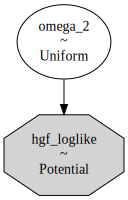

In [ ]:
with pm.Model() as two_levels_binary_hgf:

    omega_2 = pm.Uniform("omega_2", -3.5, 0.0)

    pm.Potential(
        "hgf_loglike",
        hgf_logp_op(
            omega_1=jnp.inf,
            omega_2=omega_2,
            omega_input=jnp.inf,
            rho_1=0.0,
            rho_2=0.0,
            pi_1=0.0,
            pi_2=1e4,
            mu_1=jnp.inf,
            mu_2=0.5,
            kappa_1=1.0,
            omega_3=jnp.nan,
            rho_3=jnp.nan,
            pi_3=jnp.nan,
            mu_3=jnp.nan,
            kappa_2=jnp.nan
        ),
    )

pm.model_to_graphviz(two_levels_binary_hgf)

In [ ]:
with two_levels_binary_hgf:
    two_level_hgf_idata = pm.sample(chains=1)

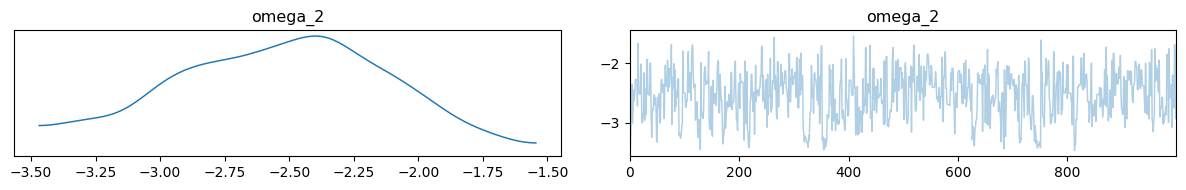

In [ ]:
az.plot_trace(two_level_hgf_idata, var_names=["omega_2"]);
plt.tight_layout()

Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


Creating a binary Hierarchical Gaussian Filter with 2 levels.
Add 320 new binary observations.


array([<Axes: ylabel='$\\mu_2$'>, <Axes: ylabel='$\\mu_1$'>, <Axes: >],
      dtype=object)

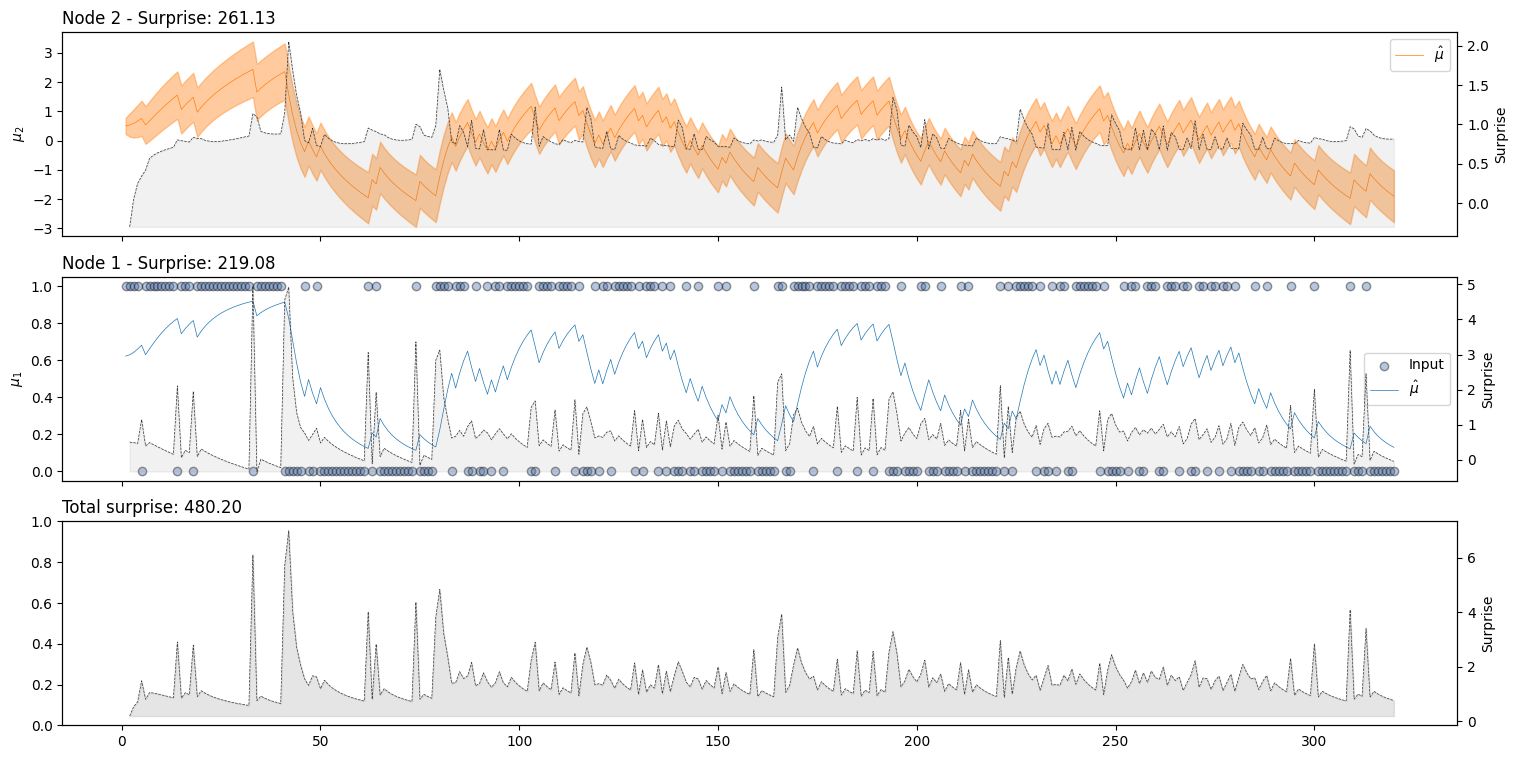

In [ ]:
omega_2 = az.summary(two_level_hgf_idata)["mean"]["omega_2"]
hgf_mcmc = HGF(
    n_levels=2,
    model_type="binary",
    initial_mu={"1": jnp.inf, "2": 0.5},
    initial_pi={"1": 0.0, "2": 1e4},
    omega={"1": jnp.inf, "2": omega_2},
    omega_input=jnp.inf,
    rho={"1": 0.0, "2": 0.0},
    kappas={"1": 1.0}).input_data(
        input_data=timeserie
    )
hgf_mcmc.plot_trajectories()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 2.3 MB/s eta 0:00:00


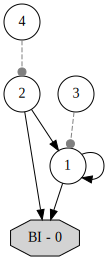

In [ ]:
!pip install pyhgf
from pyhgf.model import HGF
custom_hgf = (
    HGF(model_type=None)
    .add_input_node(kind="binary", input_idx=0)
    .add_value_parent(children_idxs=[0, 1])
    .add_value_parent(children_idxs=[0, 1])
    .add_volatility_parent(children_idxs=[1])
    .add_volatility_parent(children_idxs=[2])
)
custom_hgf.plot_network()

Creating a binary Hierarchical Gaussian Filter with 2 levels.


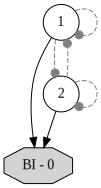

In [ ]:
from pyhgf.typing import Indexes
from pyhgf.model import HGF

parameters = {"mu": 0.0, "pi": 1.0}

parameters_structure = (parameters, parameters, parameters)
node_structure = (
    Indexes((1,2), None),
    Indexes(None, (1,2)),
    Indexes(None, (1,2)),
)
c_hgf = HGF(model_type= "binary")
c_hgf.node_structure = node_structure
c_hgf.parameters_structure = parameters_structure

#updat = c_hgf.get_update_sequence()

#pyhgf.model.HGF.add_nodes()

c_hgf.plot_network()

In [ ]:
!apt -qqq install graphviz
# !pip install graphviz

import graphviz
from numpy import loadtxt
import numpy as np
from pyhgf.distribution import hgf_logp, HGFDistribution
from pyhgf import load_data
import jax.numpy as jnp
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
from pyhgf.typing import Indexes
from pyhgf.model import HGF

parameters = {"mu": 0.0, "pi": 1.0}

parameters_structure = (parameters, parameters, parameters)
node_structure = (
    Indexes((1,2), None),
    Indexes(None, (1,2)),
    Indexes(None, (1,2)),
)

np.random.seed(123)

n_data = 6
dataset = []
for participant in range(n_data):
    input_data = []
    kappa_1 = 1.0
    omega_1 = -10.0
    omega_2 = -10.0
    mu_1 = 0.0
    mu_2 = 0.0
    pi_1 = 1e4
    pi_2 = 1e1

    # two-level hierarchical gaussian random walk
    for i in range(1000):

        # x2
        pi_2 = np.exp(omega_2)
        mu_2 = np.random.normal(mu_2, pi_2**.5)

        # x1
        pi_1 = np.exp(kappa_1 * mu_2 + omega_1)
        mu_1 = np.random.normal(mu_1, pi_1**.5)

        # input node
        u = np.random.normal(mu_1, 1e-4**.5)
        input_data.append(u)

    dataset.append(np.array(input_data))
# for rw in dataset:
#     plt.plot(rw)

hgf_logp_op = HGFDistribution(
    n_levels=None,
    model_type="continuous",
    input_data=dataset,
)

hgf_logp_op.node_structure = node_structure
hgf_logp_op.parameters_structure = parameters_structure

with pm.Model() as model:

    # Priors
    #-------
    omega_1 = pm.Normal("omega_1", mu=0.0, sigma=2.0, shape=n_data)

    pm.Potential(
        "hgf_loglike",
        hgf_logp_op(
            omega_1=omega_1,
            omega_2=-10.0,
            omega_input=np.log(1e-4),
            rho_1=0.0,
            rho_2=0.0,
            pi_1=1e4,
            pi_2=1e1,
            mu_1=0.0,
            mu_2=0.0,
            kappa_1=1.0,
            omega_3=jnp.nan,
            rho_3=jnp.nan,
            pi_3=jnp.nan,
            mu_3=jnp.nan,
            kappa_2=jnp.nan
        ),
    )
    g=pm.model_to_graphviz(model)
# print(g.source)
# type(graphviz.Source(g))
g.render('./test',view=True)
'''
with model:
    idata = pm.sample(chains=1)

az.plot_trace(idata);
plt.tight_layout()

az.summary(idata)
'''

'\nwith model:\n    idata = pm.sample(chains=1)\n\naz.plot_trace(idata);\nplt.tight_layout()\n\naz.summary(idata)\n'

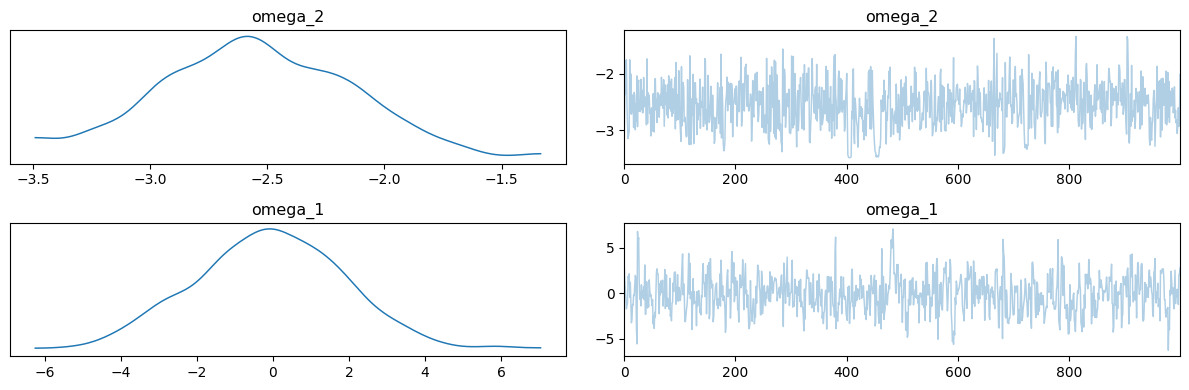

In [ ]:
!apt -qqq install graphviz

import pymc as pm
import arviz as az
from pyhgf.distribution import HGFDistribution
from pyhgf.response import first_level_binary_surprise
from numpy import loadtxt
import numpy as np
from pyhgf.distribution import hgf_logp, HGFDistribution
from pyhgf import load_data
import jax.numpy as jnp
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

timeserie = load_data("binary")

hgf_logp_op = HGFDistribution(
    n_levels=None,
    model_type="binary",
    input_data=[timeserie],
    response_function=first_level_binary_surprise,
)

parameters = {"mu": 0.0, "pi": 1.0}

parameters_structure = (parameters, parameters, parameters)
node_structure = (
    Indexes((1,2), None),
    Indexes(None, (2,)),
    Indexes(None, (1,)),
)

hgf_logp_op.node_structure = node_structure
hgf_logp_op.parameters_structure = parameters_structure

with pm.Model() as two_levels_binary_hgf:

    omega_2 = pm.Uniform("omega_2", -3.5, 0.0)
    omega_1 = pm.Normal("omega_1", mu=0.0, sigma=2.0)

    pm.Potential(
        "hgf_loglike",
        hgf_logp_op(
            omega_1=omega_1,
            omega_2=omega_2,
            omega_input=jnp.inf,
            rho_1=0.0,
            rho_2=0.0,
            pi_1=0.0,
            pi_2=1e4,
            mu_1=0.5,
            mu_2=0.5,
            kappa_1=1.0,
            omega_3=jnp.nan,
            rho_3=jnp.nan,
            pi_3=jnp.nan,
            mu_3=jnp.nan,
            kappa_2=jnp.nan
        ),
    )

g=pm.model_to_graphviz(two_levels_binary_hgf)
# print(g.source)
# type(graphviz.Source(g))
g.render('./omega1n2',view=True)

with two_levels_binary_hgf:
   two_levels_hgf_idata = pm.sample(chains=1)

az.plot_trace(two_levels_hgf_idata, var_names=["omega_2", "omega_1"]);
plt.tight_layout()

In [ ]:
!apt -qqq install graphviz

import pymc as pm
import arviz as az
from pyhgf.distribution import HGFDistribution
from pyhgf.response import first_level_binary_surprise
from numpy import loadtxt
import numpy as np
from pyhgf.distribution import hgf_logp, HGFDistribution
from pyhgf import load_data
import jax.numpy as jnp
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

timeserie = load_data("binary")

hgf_logp_op = HGFDistribution(
    n_levels=None,
    model_type="binary",
    input_data=[timeserie],
    response_function=first_level_binary_surprise,
)

hgf_logp_op.make_node(hgf_logp_op, omega_ =  )

TypeError: ignored

In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm

%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
u = np.random.randn(size)
#X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
x1 = alpha + beta[0] * X1 + beta[1] * X2 + np.random.randn(size) * sigma

with basic_model:

    # Priors for unknown model parameters
    u = pm.Normal("u", mu=0, sigma=10)
    x1 = pm.Normal("x1", mu=0, sigma=10, shape=2)
    x2 = pm.Normal("x2", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)